# *ers-transit Data Checkpoint:* fitted planetary features 🪐⧳  (WASP-39b transit edition)
*21 March 2022*

Contributors:
- Zach Berta-Thompson
- Catriona Murray
- Patricio Cubillos

This notebook aims to serve as a quick way to visualize and evaluate results produced for the [Spring 2022 Data Challenge with Simulated Data](https://ers-transit.github.io/data-challenge-with-simulated-data.html) for the [Webb Transiting Exoplanet Community Early Release Science Program](https://ers-transit.github.io/index.html).

## 🧑‍💻 Load the Data

Let's load a file of **fitted planetary features** This file should be plain text, and it should contain the following 3-4 columns.
+ `wavelength` should represent the central wavelength of the wavelength bin. Alternatively, there could be two columns labeled `wavelength_lower` and `wavelength_upper` to represent the lower and upper bounds of each wavelength bin. The units should be in microns.
+ `depth` should be the transit depth $(R_p/R_\star)^2$ or the eclipse depth ($F_p/F_\star$). This quantity should be unitless; for example, a transit depth of 1% should be written as `0.01`.
+ `uncertainty` should be the uncertainty on the depth. This quantity should have the same units as depth (so also be unitless).



In [24]:
from utils import *

In [25]:
data = load_data('NIRCam/Murray_NIRCam_transmission3.txt')

In [26]:
data.table

wavelength,depth,uncertainty,wavelength_lower,wavelength_upper
micron,,,micron,micron
float64,float64,float64,float64,float64
2.370760440826416,0.010068075464040002,0.00036349095948,2.3496764302253723,2.3918444514274597
2.4129284620285034,0.02268951740416,1.61174528e-05,2.3918445110321045,2.4340124130249023
2.4550962448120117,0.023622337459359995,5.6867371999999995e-06,2.43401238322258,2.4761801064014435
2.4972639083862305,0.01165136742225,1.8997704e-06,2.476180076599121,2.51834774017334
2.539431571960449,0.01159758840241,2.13230358e-06,2.518347352743149,2.5605157911777496
2.581600785255432,0.02401802550625,4.556338499999999e-06,2.560516506433487,2.6026850640773773
2.62376868724823,0.023722098792040004,4.281750440000001e-06,2.6026847064495087,2.6448526680469513
2.6659367084503174,0.02445276532644,3.4089488400000002e-06,2.644852787256241,2.687020629644394


## 📊 Compare Data and Model
Now, let's make plot comparing that transmission spectrum to the associated injected 
model.

In [27]:
from injected import *

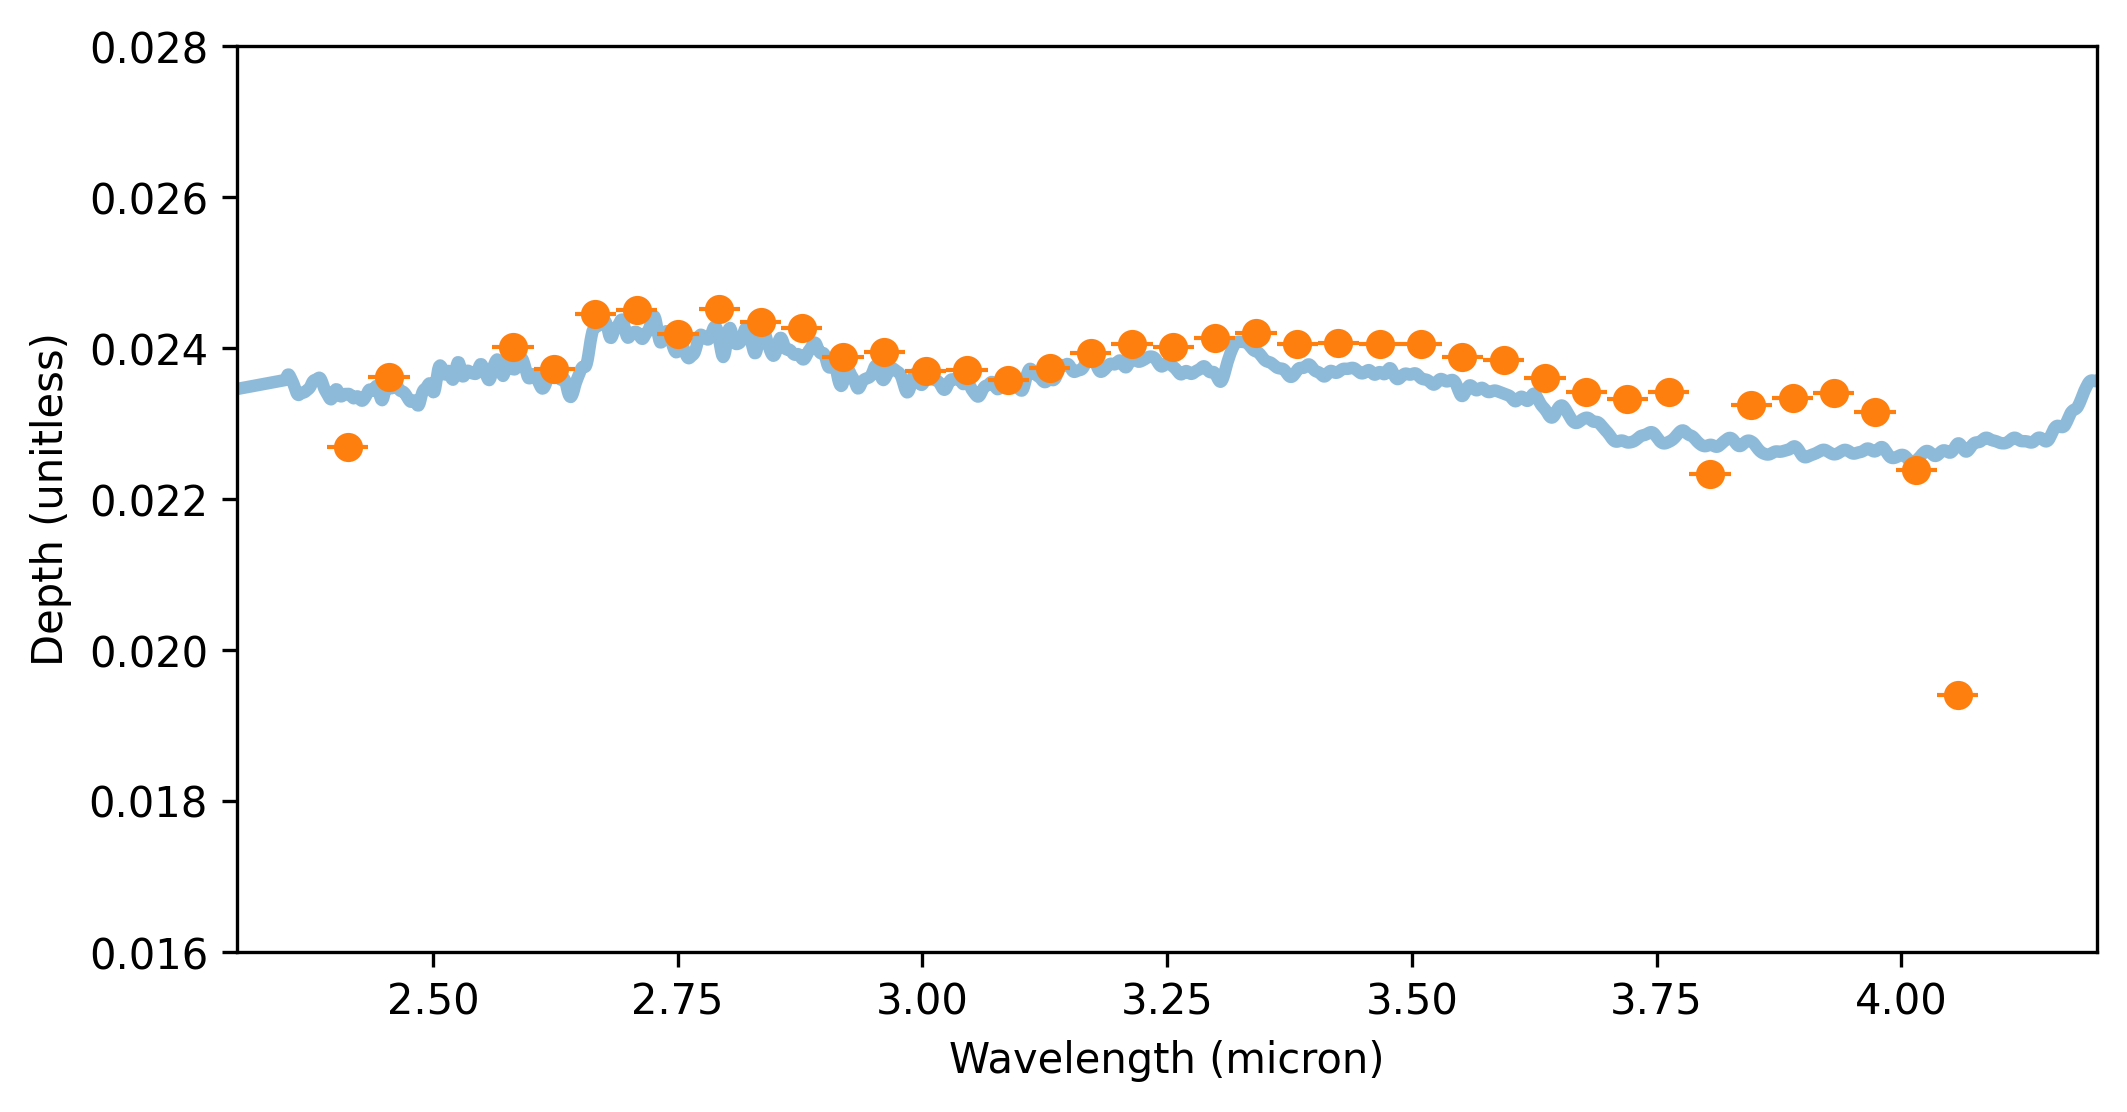

In [28]:
model = models['NIRCam']
fig,ax = plt.subplots(figsize=(8,4), dpi=300)

model.plot(ax=ax)
data.plot(ax=ax)
plt.xlim(2.3,4.2)
plt.ylim(0.016,0.028);

## 🎨 Plot Everything
Now, let's make plots that compare lots of different folks' submitted features to the injected transmission signal.

List of Submitted Files for NIRCam:
 NIRCam_transmission_spectrum_GP_2kernels.txt
 Murray_NIRCam_transmission3.txt
 NIRCam_transmission_spectrum_noGP.txt
 Stevenson-NIRCam-Astro-S6.txt
 spec_astroph.csv
 ERS_Astrophysical_TransSpectrum.txt
 NIRCam_transmission_spectrum_GP.txt
List of Submitted Files for NIRSpec:
 DC_Extracted_Prism_Transmission_spectra_Sing_Res80_3Mar.csv
 Transmission_spectra.txt
 NIRSpec_transmission_spectrum.txt


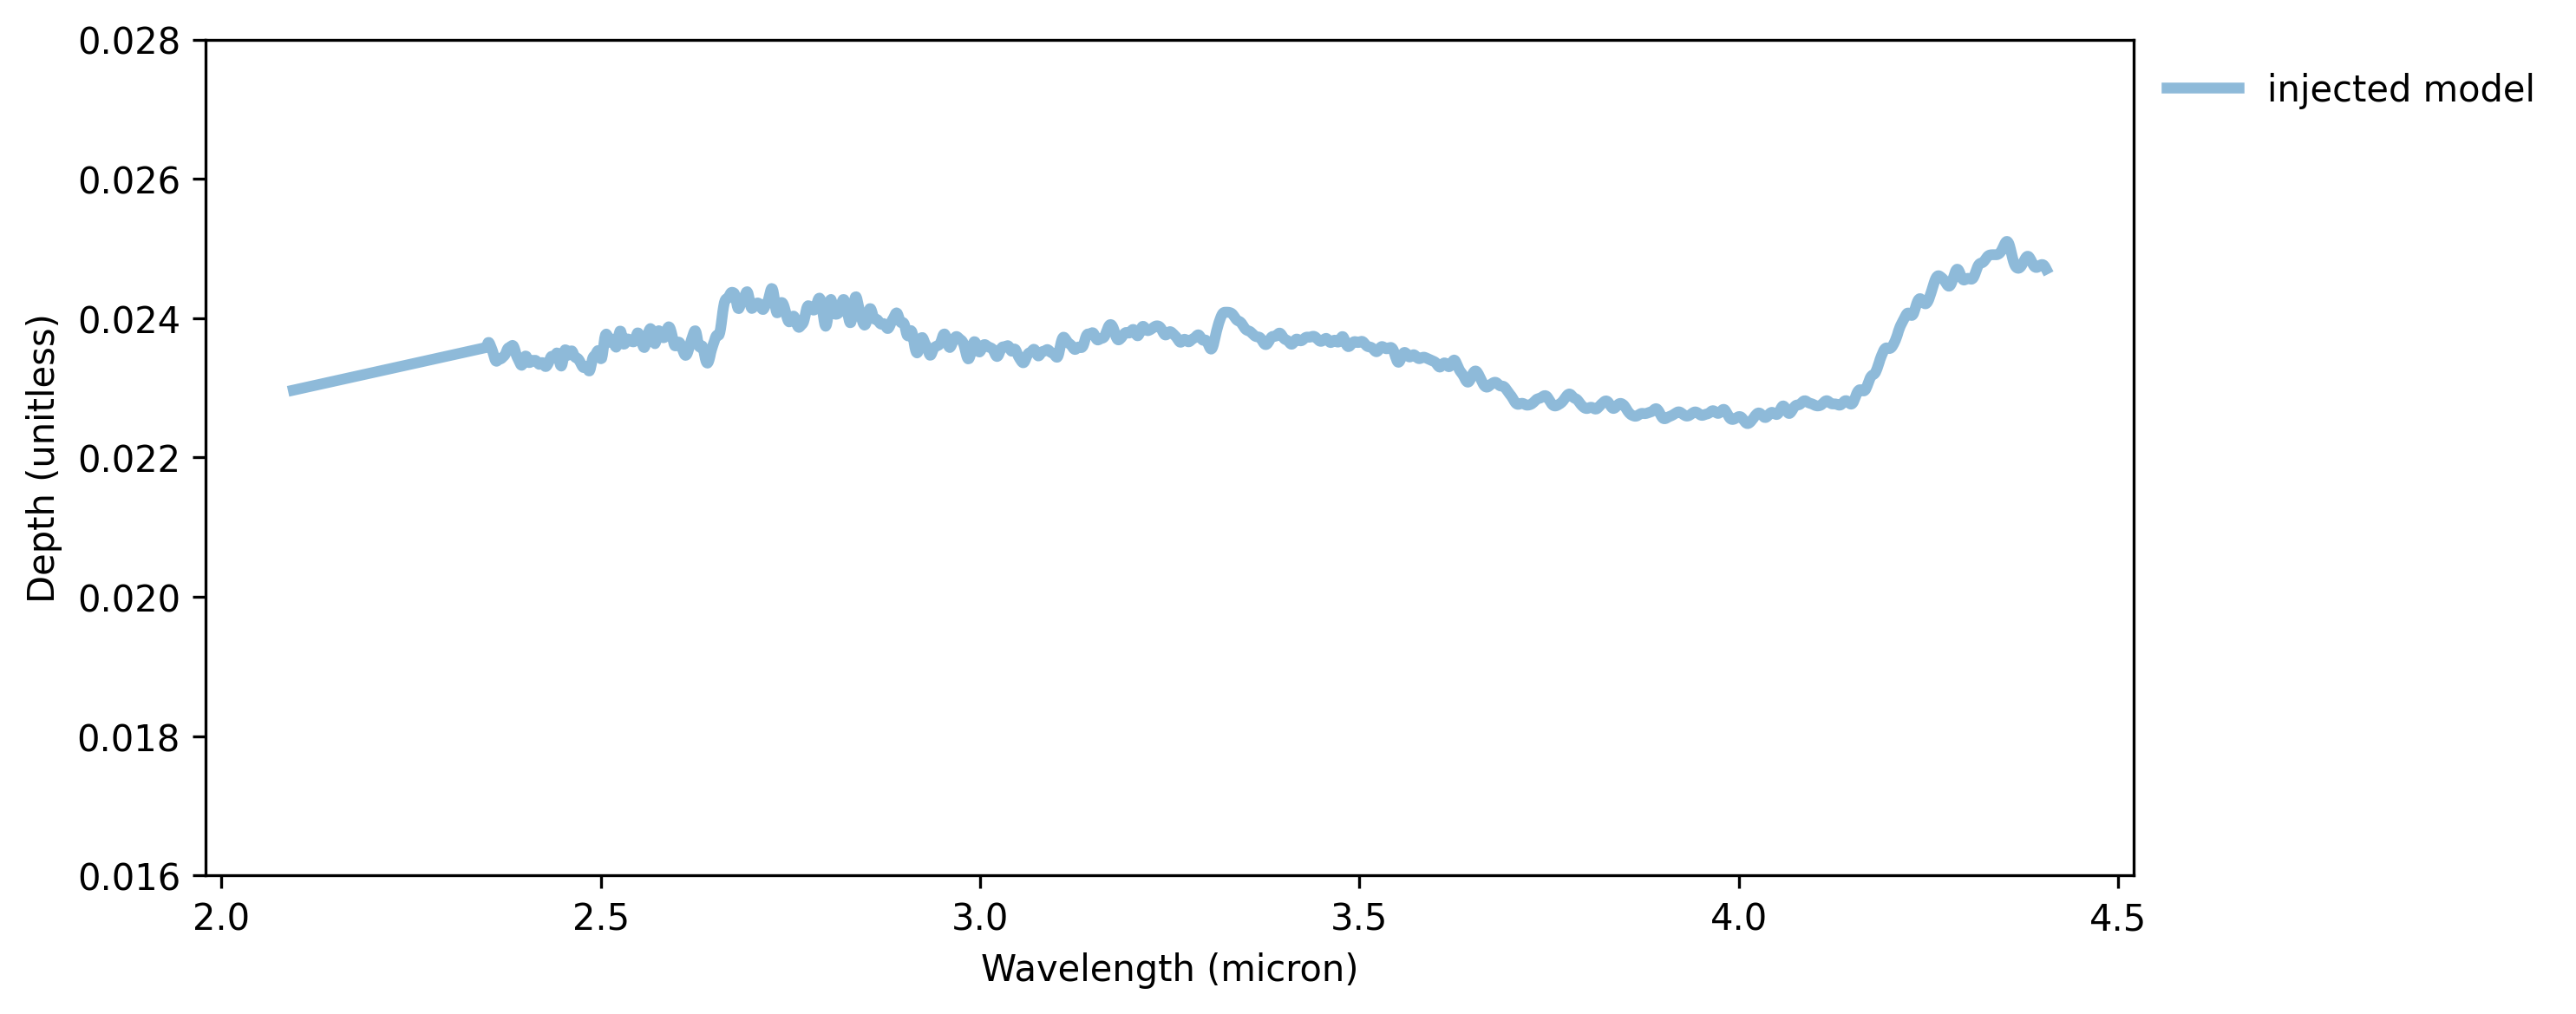

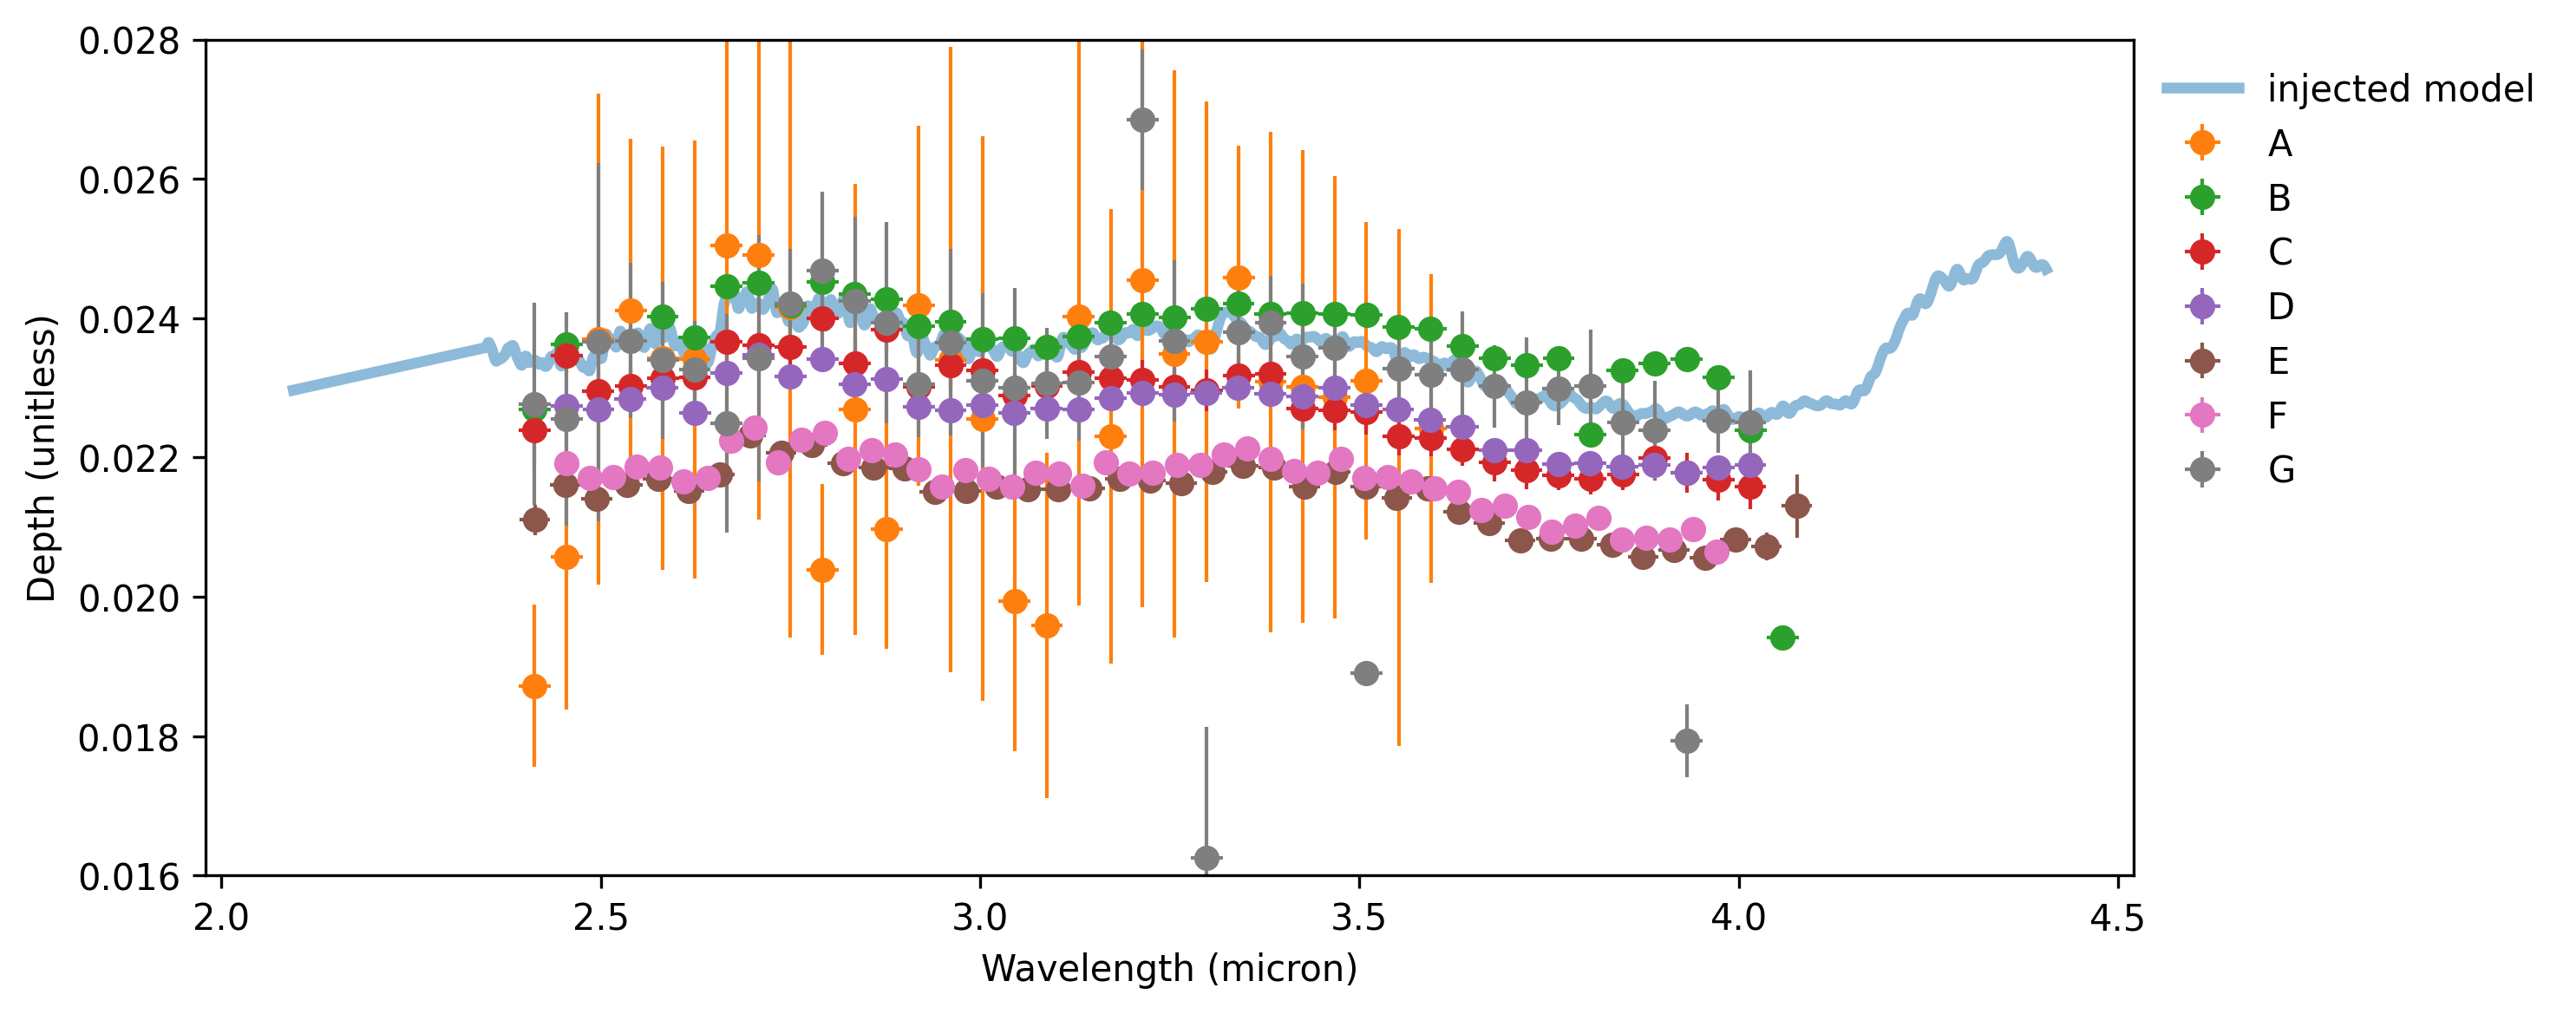

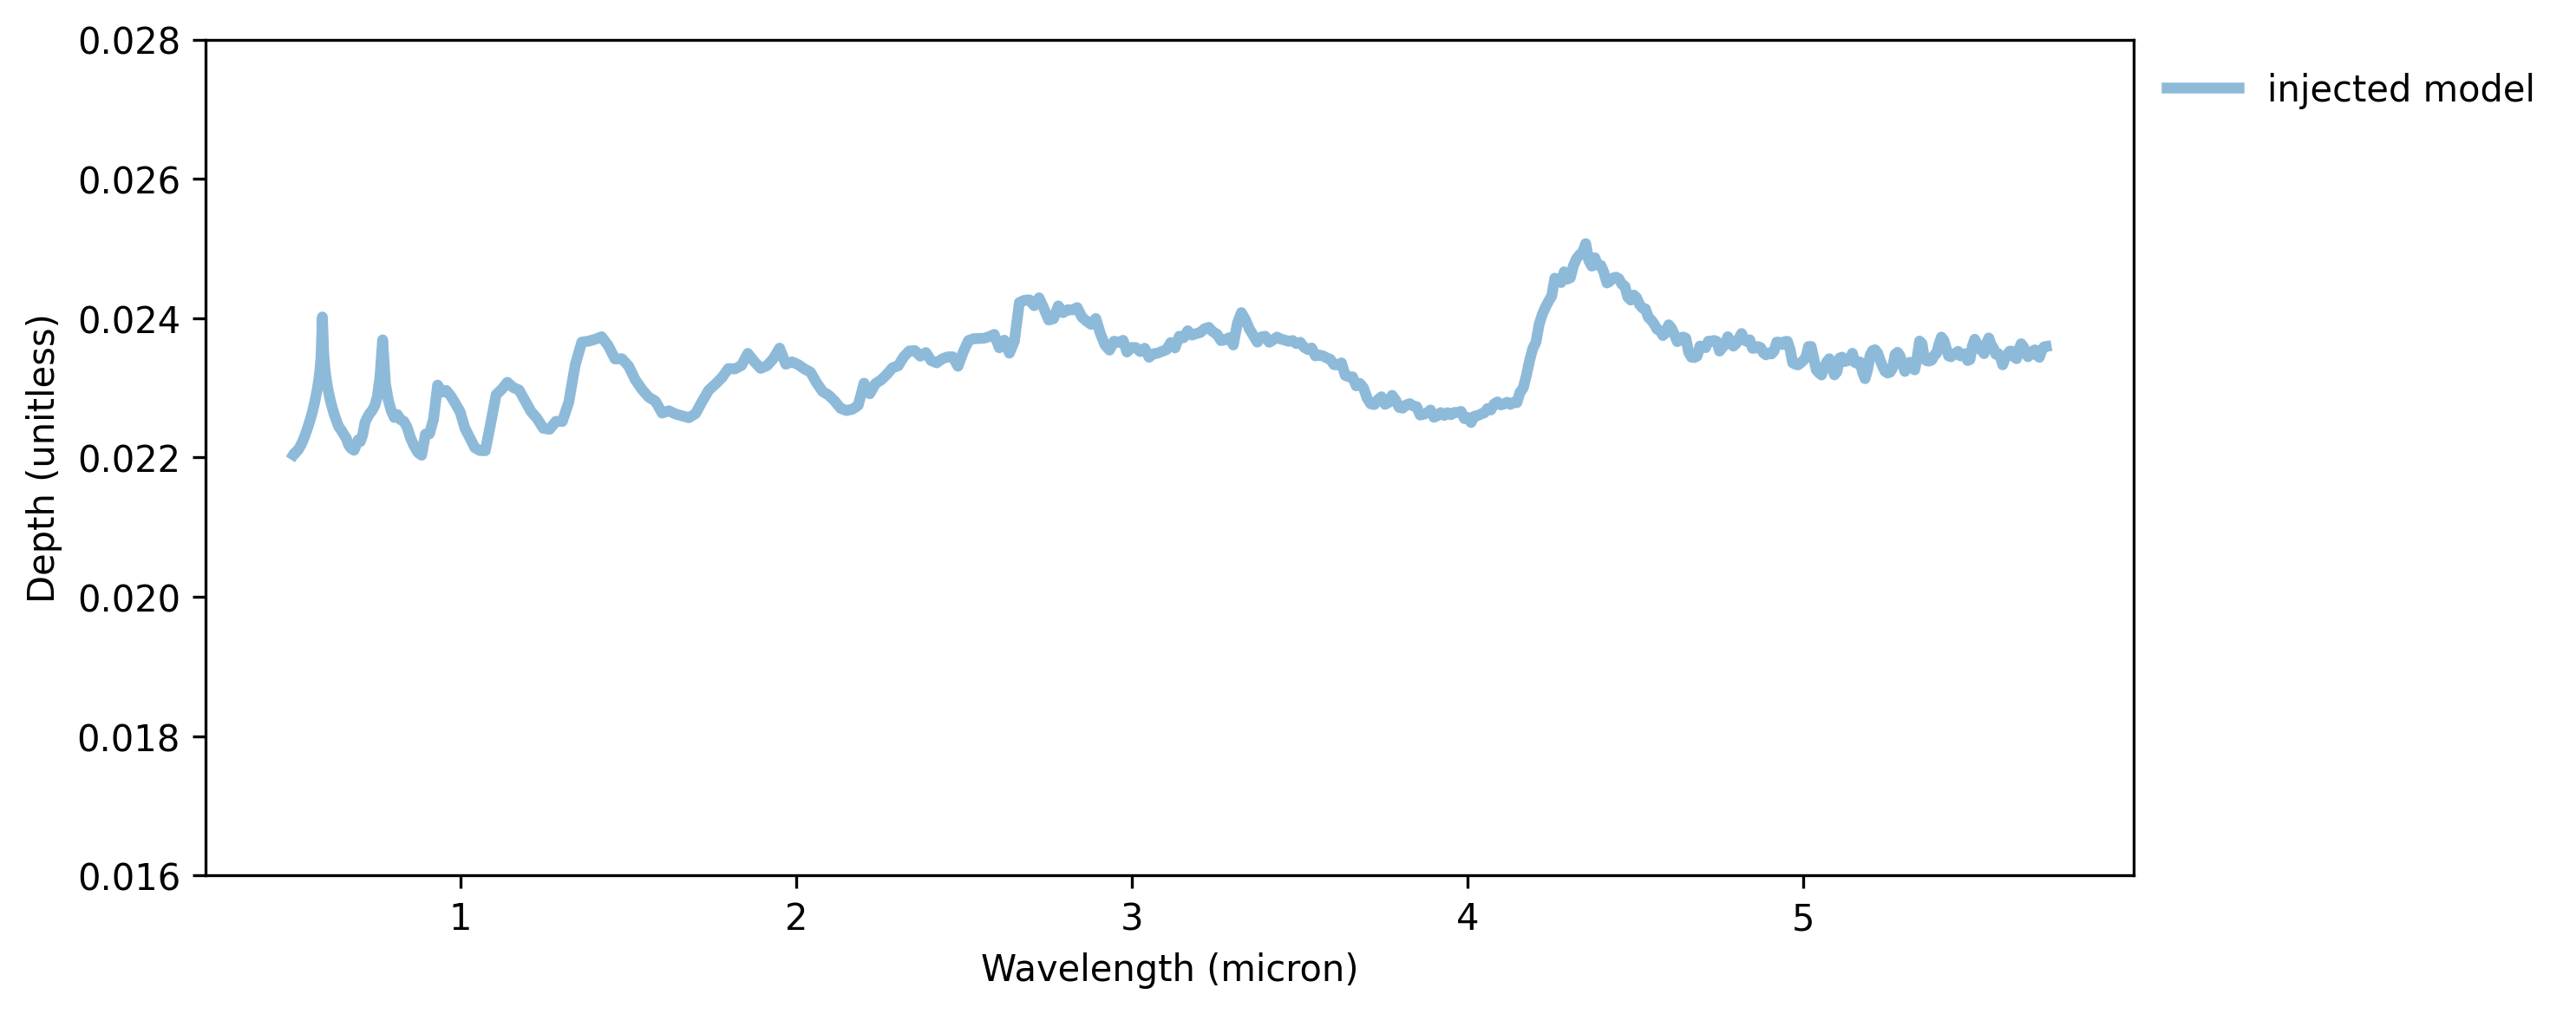

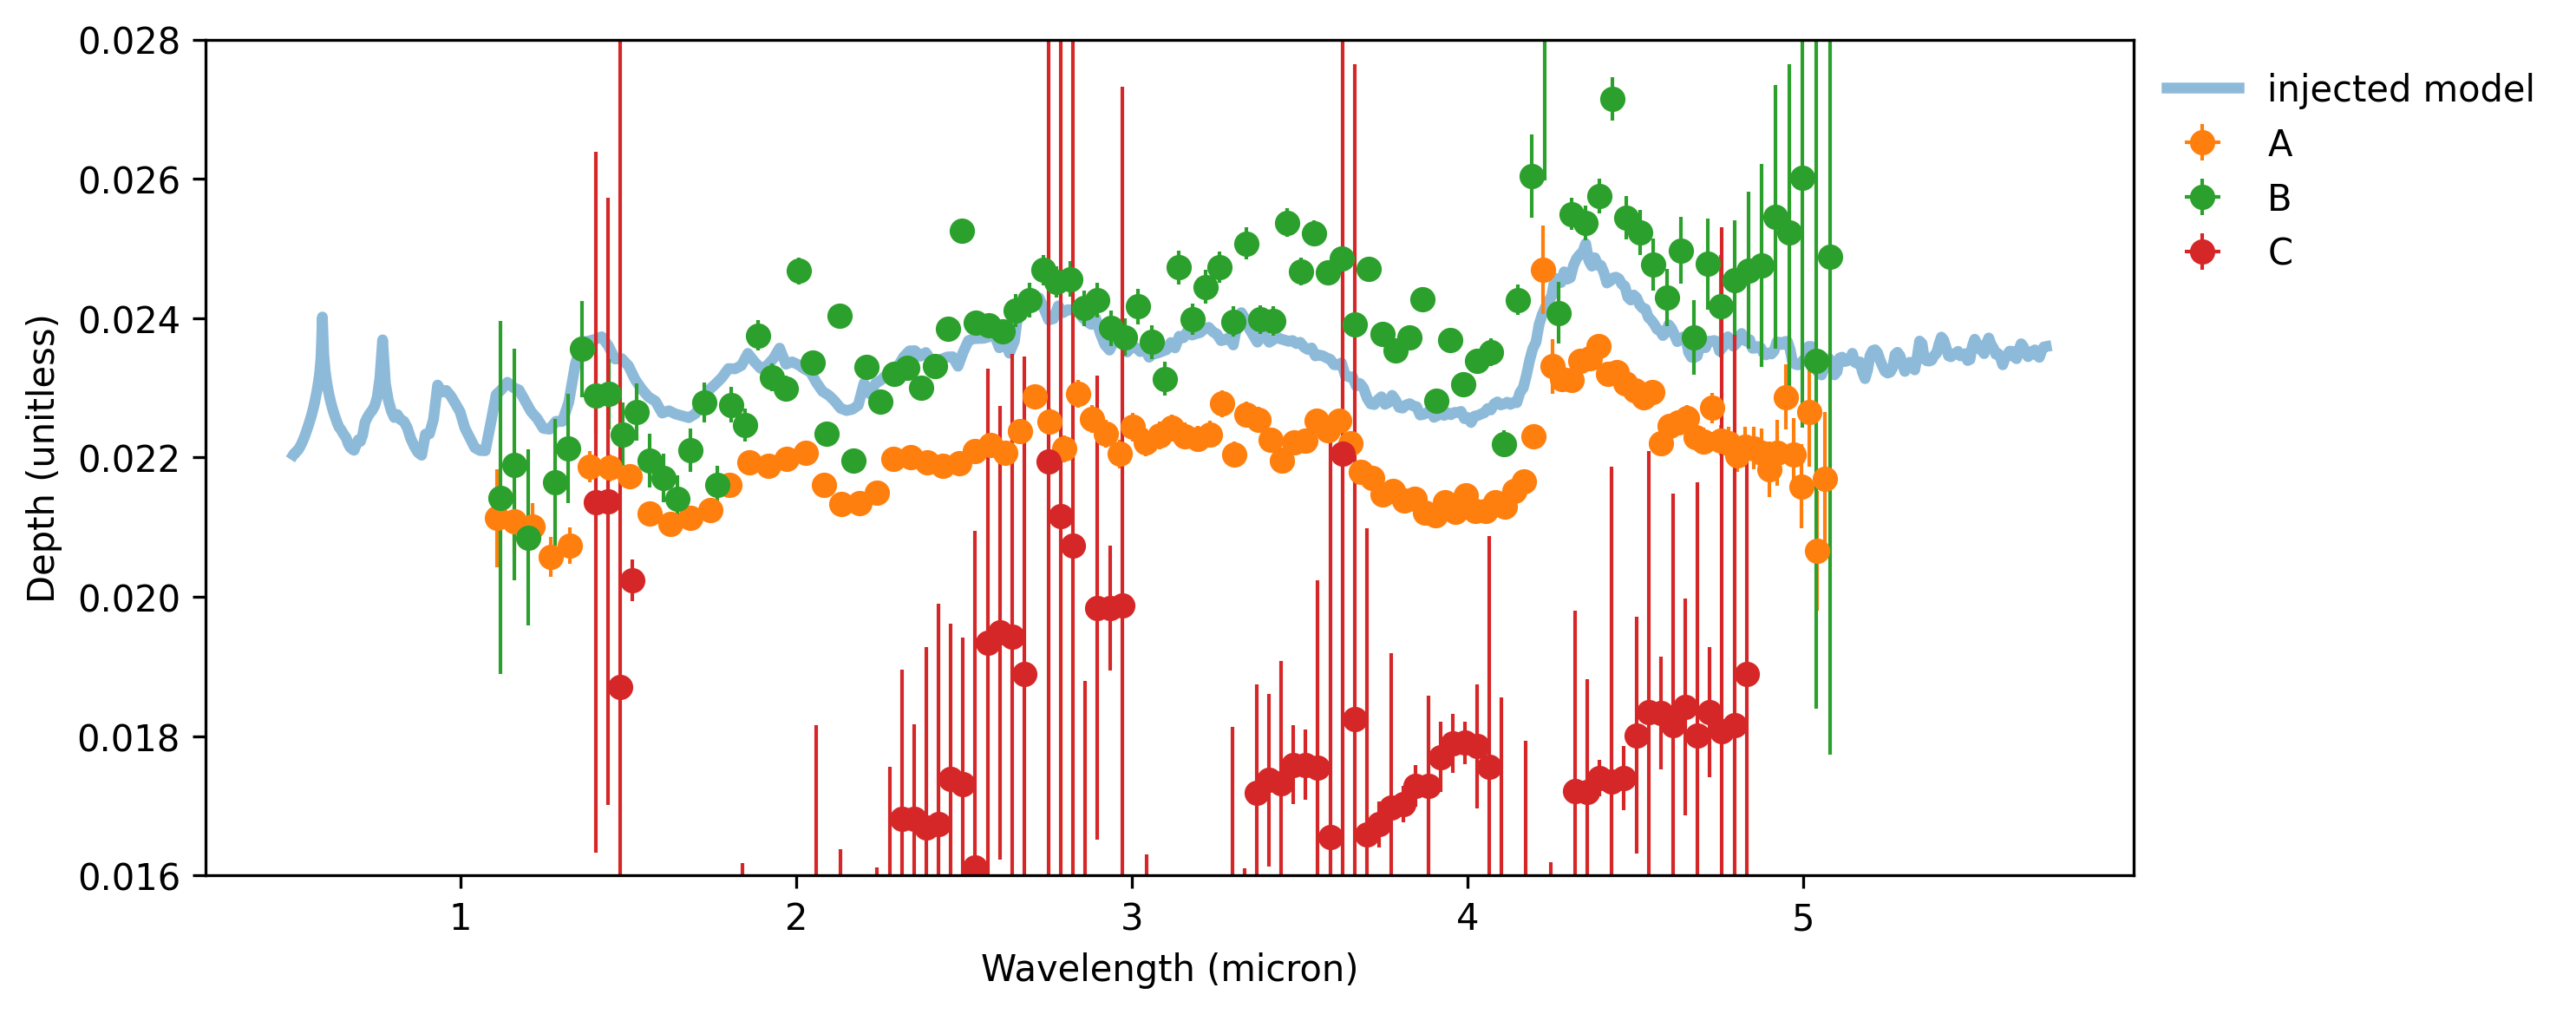

In [34]:
for instrument in ['NIRCam', 'NIRSpec']:
    for with_data in ['without', 'with']:
        fig,ax = plt.subplots(figsize=(10,4), dpi=300, facecolor='white')

        # plot the model underneath all the user-submitted data
        models[instrument].plot(ax=ax)

        if with_data == 'with':
            # import all the participant data
            all_dfiles = glob.glob(f"{instrument}/*")
            print(f"List of Submitted Files for {instrument}:\n","\n ".join([d.split("/")[-1] for d in all_dfiles]))

            for d, abc in zip(all_dfiles, 'ABCDEFGHIJK'):

                # load each user's data
                data = load_data(d)

                # plot each user's data
                data.plot(ax=ax, label=abc)

        plt.ylim(0.016,0.028)
        plt.legend(frameon=False,bbox_to_anchor=(1,1), loc='upper left')
        plt.tight_layout();
        
        plt.savefig(f'WASP39b-model-{instrument}-{with_data}-data.png')

## Things to add:
- bin model to match data bins
- $\chi^2$ of real model, with no offset
- $\chi^2$ of real model, allowing offset
- $\chi^2$ of a flat line, allowing offset
- flipbook of multiple results flashing against same model
- ...